# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `6` | `Questions`

> Hi, Team. 👋

> I hope you are having a restful recess week. The purpose of the current exercise problem sets is to consolidate and expand the understanding of algorithmic trading tool kits that you have developed in the course.

> Building on what you have learned thus far, these problem sets will ask you to create trading strategies, capitalizing on commonly used technical indicators.

> Please submit your answers via the submission portal at eLearn. Again, it would be a good practice to attempt to answer these questions within the designated time limit.

> As with the previous exercise problem sets, the questions are written in such a way that helps advance your learning, rather than testing you.

> Enjoy!"🤞

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf
import math as mt


> Let's set some print option.

In [2]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

## 👇 Questions 1 to 4 ask you to build, execute, and backtest a strategy based on one kind of momentum strategy called the `Moving Average Convergence Divergence` (MACD) crossover.

### <font color = blue> 👉 Question 1</font>. Let’s take a look at Apple (AAPL) as our security of interest, over the three-year period of 2015 through 2017.

Caden Edit:
1. Changed from pdr to yf since we did not have yf overide

In [3]:
def obtain(stocks, start, end):
    def data(ticker):
        return(yf.download(ticker, 
                                  start = start,
                                  end = end)
              )
    
    stock_data = map(data, stocks)
    return(pd.concat(stock_data,
                     names = ["Date"]
                    )
           )

In [4]:
stocks = [ "AAPL"]

In [5]:
data = obtain(stocks,
                  dt.datetime(2015, 1, 1),
                  dt.datetime(2017, 12, 31)
                  )
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,28.205000,28.282499,27.552500,27.594999,24.733967,165613600
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.498686,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.808516,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.810757,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.144629,160423600
...,...,...,...,...,...,...
2017-12-22,43.669998,43.855000,43.625000,43.752499,41.427490,65397600
2017-12-26,42.700001,42.867500,42.419998,42.642502,40.376472,132742000
2017-12-27,42.525002,42.695000,42.427502,42.650002,40.383579,85992800


#### Moving Average Convergence Divergence (`MACD`) is a lagging, trend-following momentum indicator reflecting the relationship between two moving averages of stock prices.

#### The strategy utilizes two indicators, the MACD and the MACD signal line:

- The MACD is defined as the `difference` between the `12`-day ***exponential*** moving average and the `26`-day exponential moving average.
- The MACD signal line is then defined as the `9`-day ***exponential*** moving average of the MACD.

### <font color = green> NOTE: The MACD crossover strategy is defined as:

- A `bullish` crossover arises when the MACD line turns `upward and crosses` beyond the MACD signal line.
- A `bearish` crossover arises when the MACD line turns `downward and crosses` under the MACD signal line.

### Visualize your buy and sell positions.

### Below are the lines of code that lead to an answer:

In [6]:
short_window = 12
long_window = 26
signal_window = 9
price = 'Close'


data["EWMA_short"] = data[[price]].ewm(span = short_window).mean()
data["EWMA_long"] = data[[price]].ewm(span = long_window).mean()
data["MACD"] = data["EWMA_short"] - data["EWMA_long"]
data["MACD_signal"] = data[["MACD"]].ewm(span = signal_window).mean()
data["MACD_hist"] = data["MACD"] - data["MACD_signal"]
# data["positions"] = data["MACD_hist"].apply(lambda x :1 if x>0 else 0)

#Caden edit:
data["positions"] = np.nan
data["positions"].iloc[short_window:] = data.iloc[short_window:].apply(lambda x:
                                                                       1 if x["MACD_hist"]>0 
                                                                       else x["positions"], axis = 1)
data["positions"].iloc[short_window:] = data.iloc[short_window:].apply(lambda x :-1 
                                                                       if x["positions"]<0 
                                                                       else x["positions"], axis = 1)
data["positions"] = data["positions"].fillna(0)

data["buy_sell_positions"] = data["positions"].diff()    #diff
data = data.loc['2015-01-02':,:]

C:\Users\leeca\anaconda3\envs\finsinyur\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\leeca\anaconda3\envs\finsinyur\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [7]:
def plot_chart(data, ):
    fig = plt.figure()  
    fig.set_size_inches((20, 16))
    ax_close = fig.add_axes((0, 0.72, 1, 0.32))   
    ax_position = fig.add_axes((0, 0.48, 1, 0.2), sharex=ax_close)
    ax_macd = fig.add_axes((0, 0.24, 1, 0.2), sharex=ax_close)  
    ax_vol = fig.add_axes((0, 0, 1, 0.2), sharex=ax_close)   
    #close
    ax_close.plot(data.index, data[price], label=price)

    # Selling
    ax_close.plot(data.loc[data.buy_sell_positions == -1.0].index,
             data[price][data.buy_sell_positions == -1.0],
             "v",
             markersize = 12,
             color = "green",
            label = 'Selling')

    # Buying
    ax_close.plot(data.loc[data.buy_sell_positions == 1.0].index,
             data[price][data.buy_sell_positions == 1.0],
             "^",
             markersize = 12,
             color = "red",
            label = 'Buying')
    
    ax_close.set_title(price)
    ax_close.legend()
    #buy and sell position
    ax_position.plot(data.index, data["buy_sell_positions"], label="buy_sell_positions")
    ax_position.set_title('Positions')
    ax_position.legend()
    #MACD
    ax_macd.plot(data.index, data["MACD"], label="MACD")
    ax_macd.bar(data.index, data["MACD_hist"] * 3, label="hist")
    ax_macd.plot(data.index, data["MACD_signal"], label="signal")
    ax_macd.set_title('MACD')
    ax_macd.legend()
    #Volume
    ax_vol.bar(data.index, data["Volume"] / 1000000,)
    ax_vol.set_ylabel("Volume(million)")
    ax_vol.set_title('Volume')
 
    plt.show()



### <font color = red> Answer 1 is presented in the cell below: </font>

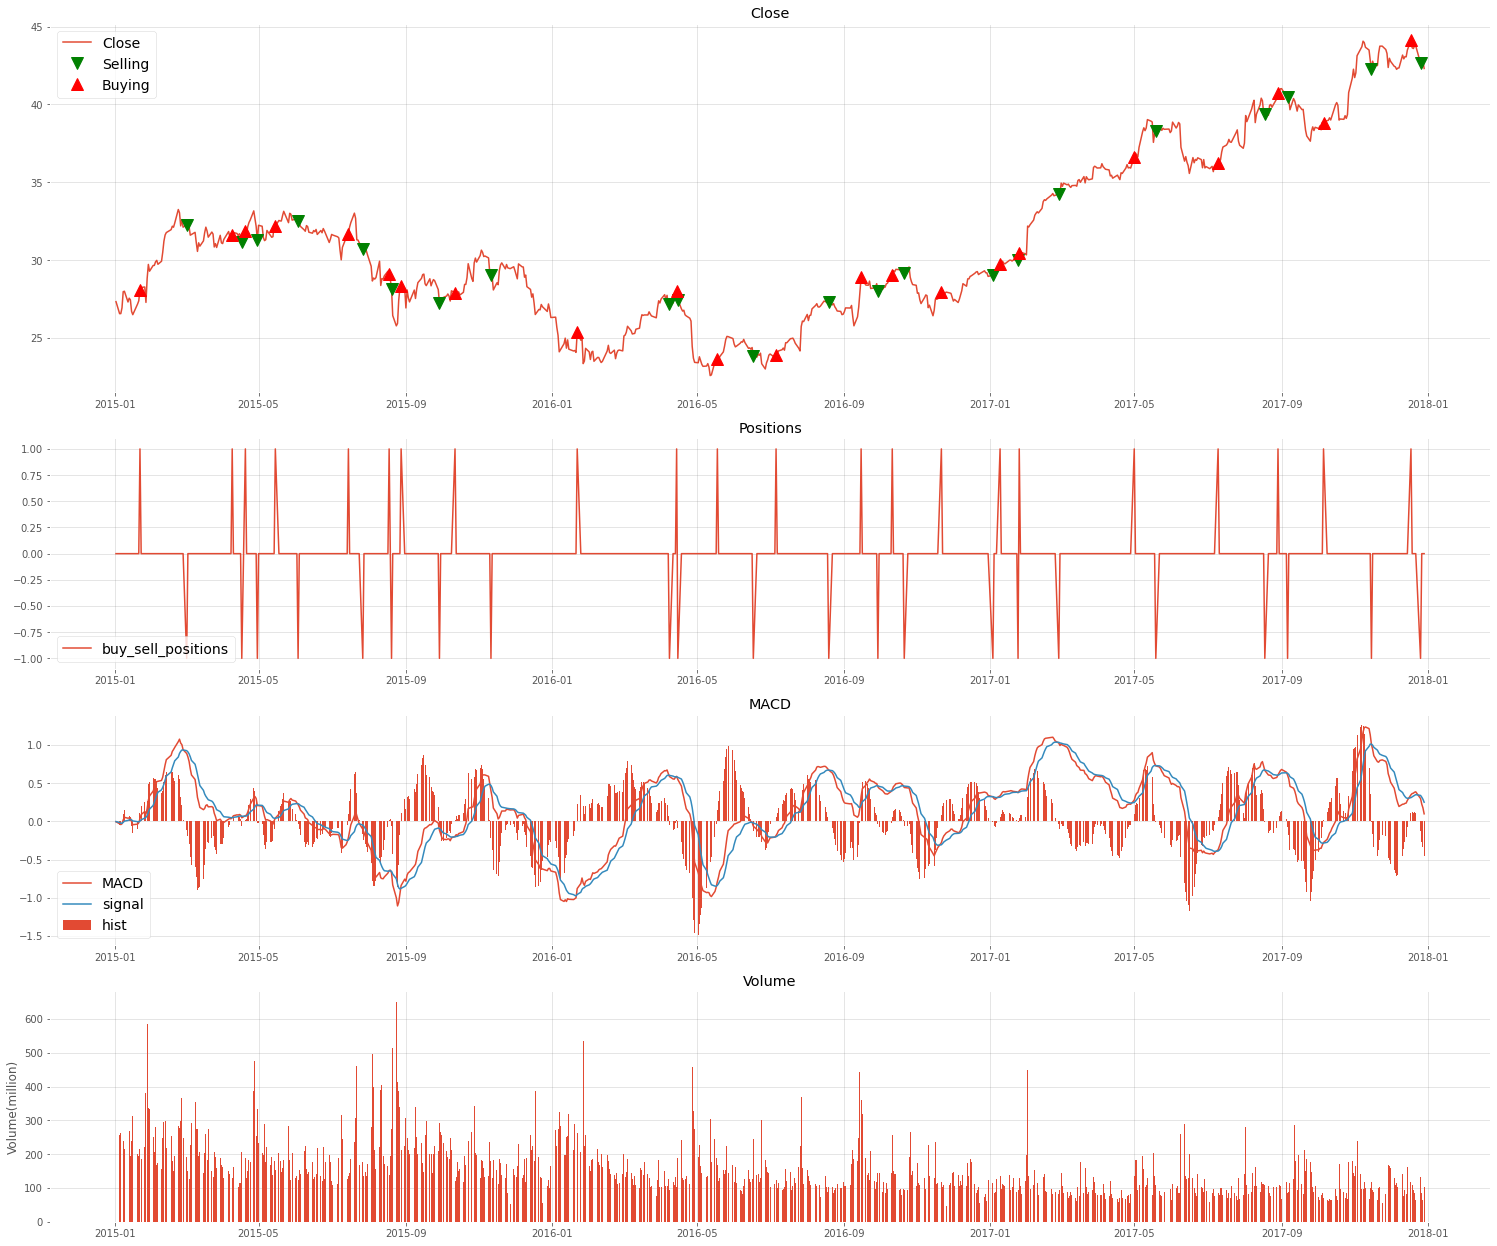

In [8]:
plot_chart(data,)

### <font color = blue> 👉 Question 2</font>. Let’s suppose that you started from a $100,000 capital base for the given security.

### Given a $5 fixed commission fee per trade, how much in cumulative returns could you have had as a result of the MACD crossover strategy?

### Below are the lines of code that lead to an answer:

In [9]:
our_capital_list = []
our_capital = 100000.0
cash_list = []
cash = 100000.0
volume_list = []
fee_list = []
auction_volume_list = []
spread_list = []
volume = 0
fee = 0
closing_price_list = []

our_position = pd.DataFrame(index = data.index).fillna(0.0)

for Date in data.index:
    
    spread = 0.25
    auction_volume = 2000
    vol = (cash - fee) // data.loc[data.index == Date,"Close"][0]   
    
    if data.loc[data.index == Date,"buy_sell_positions"][0] == 1:
        fee = mt.floor(vol/auction_volume)*0.25*vol + 5.0
        volume = (cash - fee) // data.loc[data.index == Date,"Close"][0] 
        volume_list.append(volume)
        cash = cash - volume * data.loc[data.index == Date,"Close"][0]  - fee
        cash_list.append(cash)
        our_capital = volume * data.loc[data.index == Date,"Close"][0]  + cash
        our_capital_list.append(our_capital)
        fee_list.append(fee)
        spread_list.append(spread)
        auction_volume_list.append(auction_volume)
        closing_price_list.append(data.loc[data.index == Date,"Close"][0])
    elif data.loc[data.index == Date,"buy_sell_positions"][0] == -1:
        if  volume != 0:
            #fee = mt.floor(volume/auction_volume)*0.25*volume + 5.0
            cash = cash - fee + volume * data.loc[data.index == Date,"Close"][0] 
            cash_list.append(cash)
            volume = 0
            volume_list.append(volume)
            our_capital = volume * data.loc[data.index == Date,"Close"][0]  + cash
            our_capital_list.append(our_capital)
            fee_list.append(fee)
            spread_list.append(spread)
            auction_volume_list.append(auction_volume)
            closing_price_list.append(data.loc[data.index == Date,"Close"][0])
        else:
            fee = mt.floor(vol/auction_volume)*0.25*vol + 5.0
            cash_list.append(cash)
            volume_list.append(volume)
            our_capital = volume * data.loc[data.index == Date,"Close"][0]  + cash
            our_capital_list.append(our_capital)  
            fee_list.append(fee)
            spread_list.append(spread)
            auction_volume_list.append(auction_volume)
            closing_price_list.append(data.loc[data.index == Date,"Close"][0])
    else:
        #fee = mt.floor(vol/auction_volume)*0.25*vol + 5.0
        cash_list.append(cash)
        volume_list.append(volume)
        our_capital = volume * data.loc[data.index == Date,"Close"][0]  + cash
        our_capital_list.append(our_capital)
        fee_list.append(fee)
        spread_list.append(spread)
        auction_volume_list.append(auction_volume)
        closing_price_list.append(data.loc[data.index == Date,"Close"][0])
        
        
back_test = pd.concat([
    pd.DataFrame(data.index,columns = ['Date']),
    pd.DataFrame(volume_list,columns = ['stock_volume']),
    pd.DataFrame(cash_list,columns = ['cash']),
    pd.DataFrame(our_capital_list,columns = ['our_capital']),
    pd.DataFrame(spread_list,columns = ['spread']),
    pd.DataFrame(auction_volume_list,columns = ['auction_volume']),
    pd.DataFrame(closing_price_list,columns = ['Close']),
    pd.DataFrame(fee_list,columns = ['fee'])
    ],axis = 1)

In [10]:
back_test.head(40)

,Date,stock_volume,cash,our_capital,spread,auction_volume,Close,fee
0,2015-01-02,0.0,100000.000000,100000.000000,0.25,2000,27.332500,0.0
1,2015-01-05,0.0,100000.000000,100000.000000,0.25,2000,26.562500,0.0
2,2015-01-06,0.0,100000.000000,100000.000000,0.25,2000,26.565001,0.0
3,2015-01-07,0.0,100000.000000,100000.000000,0.25,2000,26.937500,0.0
4,2015-01-08,0.0,100000.000000,100000.000000,0.25,2000,27.972500,0.0
5,2015-01-09,0.0,100000.000000,100000.000000,0.25,2000,28.002501,0.0
6,2015-01-12,0.0,100000.000000,100000.000000,0.25,2000,27.312500,0.0
7,2015-01-13,0.0,100000.000000,100000.000000,0.25,2000,27.555000,0.0
8,2015-01-14,0.0,100000.000000,100000.000000,0.25,2000,27.450001,0.0
9,2015-01-15,0.0,100000.000000,100000.000000,0.25,2000,26.705000,0.0


In [11]:
back_test['return'] = np.log(back_test['our_capital']/back_test['our_capital'].shift())
back_test['return_cumsum'] = np.exp(back_test['return'].cumsum())-1
back_test

,Date,stock_volume,cash,our_capital,spread,auction_volume,Close,fee,return,return_cumsum
0,2015-01-02,0.0,100000.000000,100000.000000,0.25,2000,27.332500,0.00,NaN,NaN
1,2015-01-05,0.0,100000.000000,100000.000000,0.25,2000,26.562500,0.00,0.000000,0.000000
2,2015-01-06,0.0,100000.000000,100000.000000,0.25,2000,26.565001,0.00,0.000000,0.000000
3,2015-01-07,0.0,100000.000000,100000.000000,0.25,2000,26.937500,0.00,0.000000,0.000000
4,2015-01-08,0.0,100000.000000,100000.000000,0.25,2000,27.972500,0.00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
750,2017-12-22,2850.0,11.447123,124706.068209,0.25,2000,43.752499,717.25,0.000000,0.247061
751,2017-12-26,0.0,120825.327341,120825.327341,0.25,2000,42.642502,717.25,-0.031614,0.208253
752,2017-12-27,0.0,120825.327341,120825.327341,0.25,2000,42.650002,717.25,0.000000,0.208253
753,2017-12-28,0.0,120825.327341,120825.327341,0.25,2000,42.770000,717.25,0.000000,0.208253


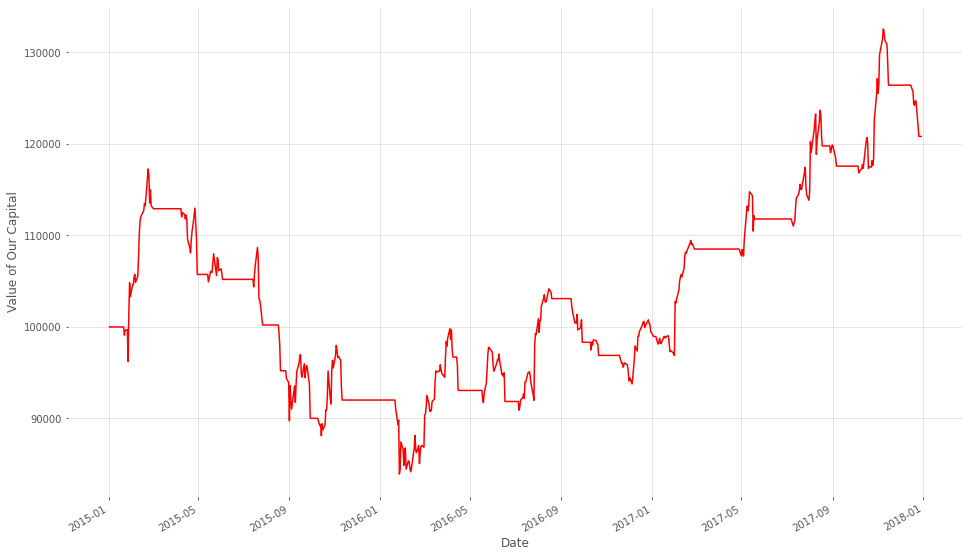

In [12]:
fig = plt.figure(figsize = (16, 10)
                 )

sub = fig.add_subplot(111,
                      ylabel = "Value of Our Capital")

back_test.set_index('Date',inplace = True)
back_test["our_capital"].plot(ax = sub, # This is our equity curve
                            color = "r")


plt.show()

### <font color = red> Answer 2 </font>

    The answer is _78.4_ % .

### <font color = blue> 👉 Question 3</font>. Now please find the `five` worst drawdown periods over the investment horizon and provide their net drawdown in % and duration, respectively.

### <font color = green> The question asks you to find the five worst drawdown periods, beyond identifying max drawdown (MDD).

### Below are the lines of code that lead to an answer:

In [13]:
back_test

,stock_volume,cash,our_capital,spread,auction_volume,Close,fee,return,return_cumsum
Date,,,,,,,,,
2015-01-02,0.0,100000.000000,100000.000000,0.25,2000,27.332500,0.00,NaN,NaN
2015-01-05,0.0,100000.000000,100000.000000,0.25,2000,26.562500,0.00,0.000000,0.000000
2015-01-06,0.0,100000.000000,100000.000000,0.25,2000,26.565001,0.00,0.000000,0.000000
2015-01-07,0.0,100000.000000,100000.000000,0.25,2000,26.937500,0.00,0.000000,0.000000
2015-01-08,0.0,100000.000000,100000.000000,0.25,2000,27.972500,0.00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
2017-12-22,2850.0,11.447123,124706.068209,0.25,2000,43.752499,717.25,0.000000,0.247061
2017-12-26,0.0,120825.327341,120825.327341,0.25,2000,42.642502,717.25,-0.031614,0.208253
2017-12-27,0.0,120825.327341,120825.327341,0.25,2000,42.650002,717.25,0.000000,0.208253


In [14]:
back_test['max_performance'] = back_test["return_cumsum"].cummax()
back_test['drawdown'] = back_test['max_performance'] - back_test["return_cumsum"]
back_test['max_drawdown'] = back_test['drawdown'].cummax()

In [15]:
# def max_drawdown(df):
#     index = df['drawdown'][df['drawdown'] == 0].index
#     a = []
#     for i in range(1,len(index)):
#         period = index[i].to_pydatetime() - index[i-1].to_pydatetime()
#         max_drawdown = df.loc[index[i-1]:index[i],'drawdown'].max()
#         a.append([period,max_drawdown,index[i-1],index[i]])
    
#     df1 = pd.DataFrame(a,columns=['period','max_drawdown','begin','end']).sort_values('max_drawdown',ascending=False)
#     df1.to_csv('tst.csv')
#     return df1 

def max_drawdown(df):
    # Find index where 'drawdown' is 0
    zero_index = df[df['drawdown'] == 0].index

    # Check if the last row has a negative 'return_cumsum'
    last_row_index = pd.Index([])  # Initialize an empty Index
    if df['return_cumsum'].iloc[-1] < 0:
        last_row_index = pd.Index([df.index[-1]])

    # Combine both sets of indices
    index = zero_index.union(last_row_index)

    a = []
    for i in range(1, len(index)):
        period = index[i].to_pydatetime() - index[i-1].to_pydatetime()
        max_drawdown = df.loc[index[i-1]:index[i], 'drawdown'].max()
        a.append([period, max_drawdown, index[i-1], index[i]])

    df1 = pd.DataFrame(a, columns=['period', 'max_drawdown', 'begin', 'end']).sort_values('max_drawdown', ascending=False)
    df1.to_csv('tst.csv')
    return df1


In [16]:
max_drawdown(back_test).head(5)

,period,max_drawdown,begin,end
23,884 days,0.333424,2015-02-23,2017-07-26
29,76 days,0.068668,2017-08-15,2017-10-30
28,6 days,0.043925,2017-08-09,2017-08-15
11,7 days,0.037682,2015-01-21,2015-01-28
24,7 days,0.036196,2017-07-26,2017-08-02


### <font color = red> Answer 3 </font>

    The Worst drawdown period     : Net drawdown ____________ % | Duration ____________ Days
    
    The 2nd worst drawdown period : Net drawdown ____________ % | Duration ____________ Days
     
    The 3rd worst drawdown period : Net drawdown ____________ % | Duration ____________ Days
         
    The 4th worst drawdown period : Net drawdown ____________ % | Duration ____________ Days
    
    The 5th worst drawdown period : Net drawdown ____________ % | Duration ____________ Days

### <font color = blue> 👉 Question 4</font>. Within the investment horizon, please calculate annual returns for each of the three years and then find the year that performs better than average vs. less than average annual returns.

In [17]:
back_test["return"]

Date
2015-01-02         NaN
2015-01-05    0.000000
2015-01-06    0.000000
2015-01-07    0.000000
2015-01-08    0.000000
                ...   
2017-12-22    0.000000
2017-12-26   -0.031614
2017-12-27    0.000000
2017-12-28    0.000000
2017-12-29    0.000000
Name: return, Length: 755, dtype: float64

### Below are the lines of code that lead to an answer:

In [18]:
np.exp(back_test["return"].groupby(back_test.index.year).sum())-1

Date
2015   -0.079877
2016    0.081829
2017    0.213818
Name: return, dtype: float64

In [19]:
Annual_mean = (np.exp(back_test["return"].groupby(back_test.index.year).sum())-1).mean()
Annual_mean

0.07192326538764293

In [20]:
Annual_return = np.exp(back_test["return"].groupby(back_test.index.year).sum())-1
Annual_return>Annual_mean

Date
2015    False
2016     True
2017     True
Name: return, dtype: bool

### <font color = red> Answer 4 </font>

    Below average year(s) : 2015 
    
    Above average year(s) : 2016、2017 
     

###  <font color = blue> 👉 Question 5. </font> What's the annualized Sharpe ratio of the current investment strategy?

### Below are the lines of code that lead to an answer:

In [21]:
Annualized_Sharpe_ratio = (np.exp(back_test["return"])-1).mean()/(np.exp(back_test["return"])-1).std()*(252**0.5)
Annualized_Sharpe_ratio

0.4645872917590197

### <font color = red> Answer 5 </font>
    
    Sharpe ratio: 1.237
    

## 👇 Questions 6 to 10 ask you to answer the above questions using your `customized functions` to `scale up`.

### Below you will find the above questions repeated, but this time you need to compare the results across the following six stocks:

### `MSFT`

### `AMZN`

### `UAL`

### `DAL`

### `XOM`

### `CVX`

### <font color = green> NOTE: When answering the questions below, please hold all the conditions (i.e., investment horizon; capital base; deployment of `MACD crossover strategy`; the flat commission fee, etc.) constant, as you did above. 
    
### <font color = green> That is, the `investment horizon` will be three years between 2015 and 2017; your `capital` is USD 100,000; and there is a USD 5 flat `commission fee` per trade. Given the iterative nature of the questions below, writing and using your customized functions will be helpful as you answer the questions.

###  <font color = blue> 👉 Question 6. </font>  Please visualize buy and sell positions for each of the six stocks. 

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 6 is presented in the cell below: </font>

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


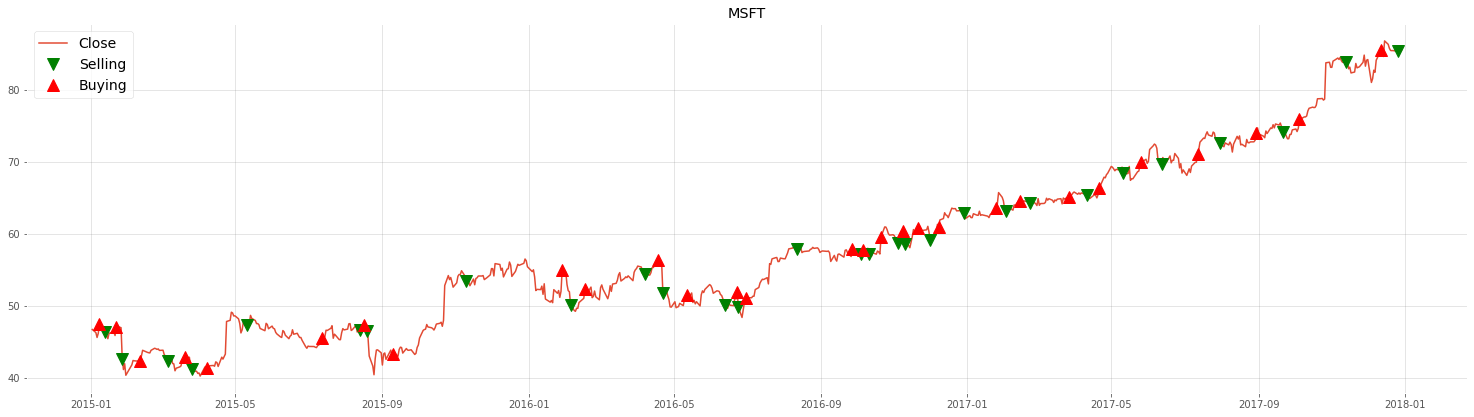

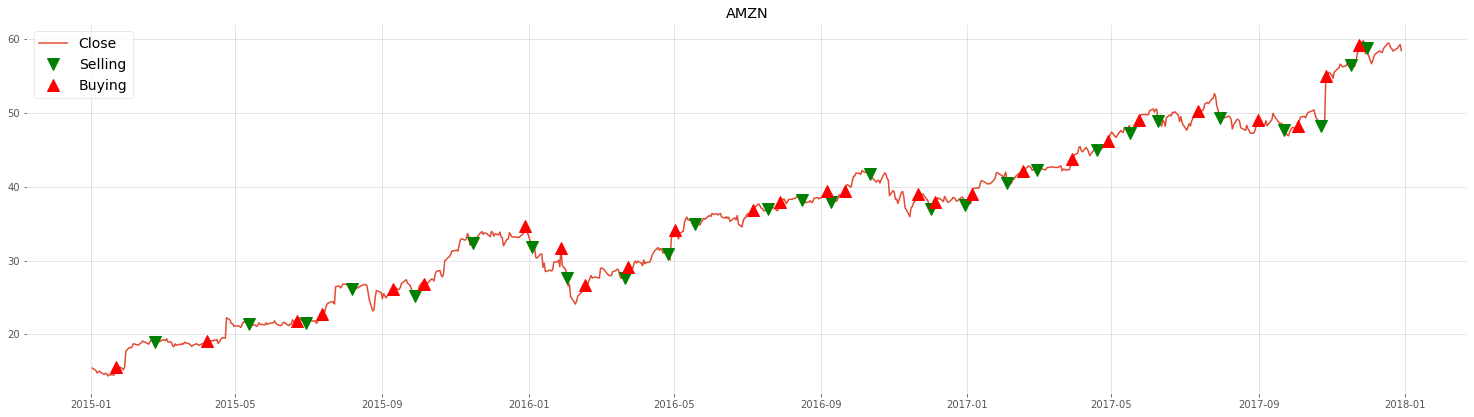

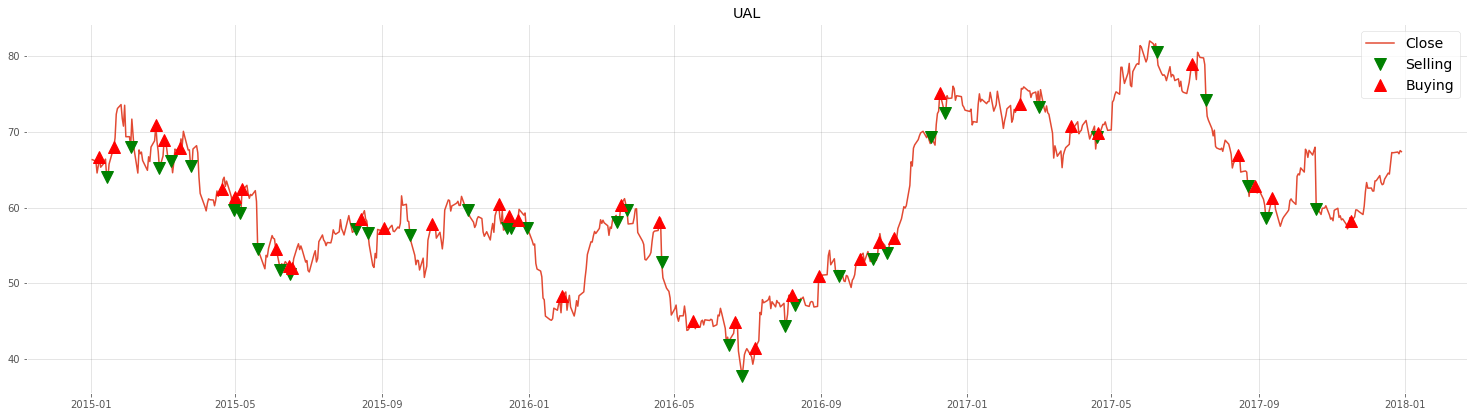

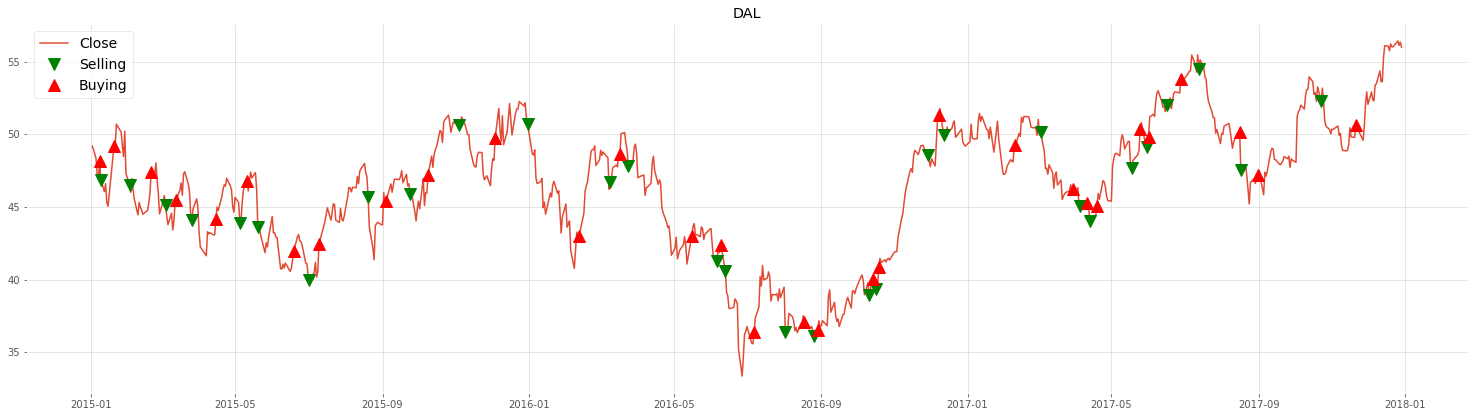

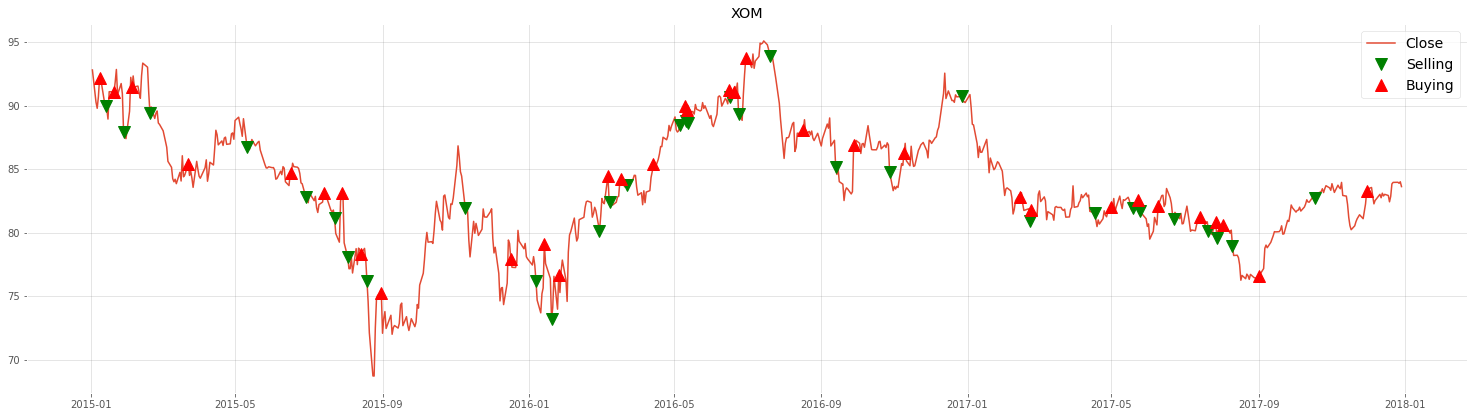

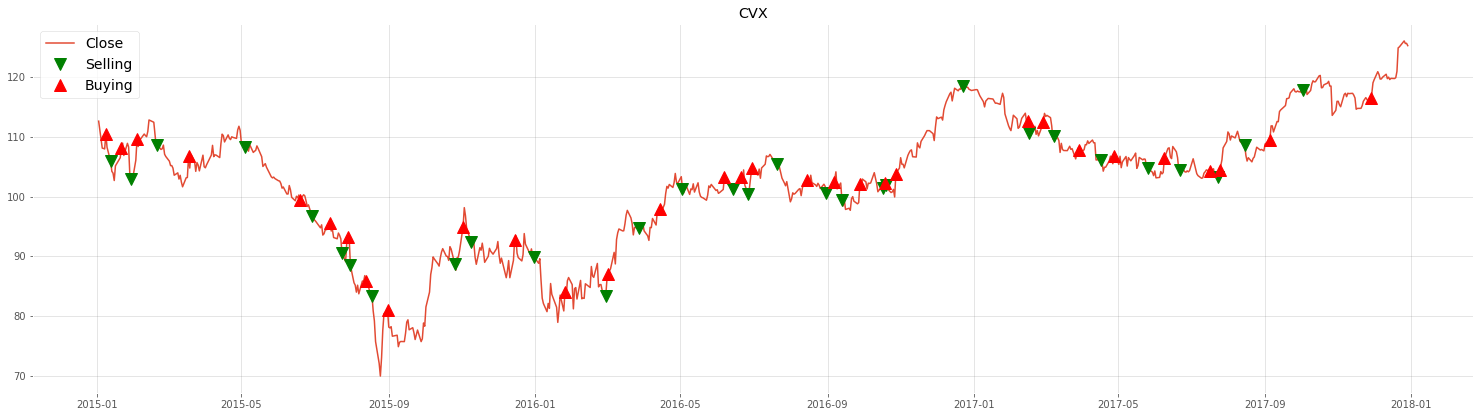

In [22]:

stocks = [  "MSFT",
            "AMZN",
            "UAL",
            "DAL",
            "XOM",
            "CVX", 
         ]
i = 0
for stock in stocks:
    data = obtain([stock],
                      dt.datetime(2015, 1, 2),
                      dt.datetime(2017, 12, 31)
                      )

    data["EWMA_short"] = data[["Close"]].ewm(span = short_window).mean()
    data["EWMA_long"] = data[["Close"]].ewm(span = long_window).mean()
    data["MACD"] = data["EWMA_short"] - data["EWMA_long"]
    data["MACD_signal"] = data[["MACD"]].ewm(span = signal_window).mean()
    data["MACD_hist"] = data["MACD"] - data["MACD_signal"]
    data["positions"] = data["MACD_hist"].apply(lambda x :1 if x>0 else 0)
    data["buy_sell_positions"] = data["positions"].diff()
    data = data.loc['2015-01-02':,:]

    fig = plt.figure()  
    fig.set_size_inches((20, 16))
    ax_close = fig.add_axes((0, 0.12*i, 1, 0.32))   
 
    #close
    ax_close.plot(data.index, data["Close"], label="Close")

    # Selling
    ax_close.plot(data.loc[data.buy_sell_positions == -1.0].index,
             data['Close'][data.buy_sell_positions == -1.0],
             "v",
             markersize = 12,
             color = "green",
            label = 'Selling')

    # Buying
    ax_close.plot(data.loc[data.buy_sell_positions == 1.0].index,
             data['Close'][data.buy_sell_positions == 1.0],
             "^",
             markersize = 12,
             color = "red",
            label = 'Buying')

    ax_close.set_title(f'{stock}')
    ax_close.legend()

plt.show()

###  <font color = blue> 👉 Question 7. </font> Which of the six stocks performs the best, based on cumulative returns?

### Below are the lines of code that lead to an answer:

In [23]:
def back_test_result(data):
    short_window = 12
    long_window = 26
    signal_window = 9

    data["EWMA_short"] = data[["Close"]].ewm(span = short_window).mean()
    data["EWMA_long"] = data[["Close"]].ewm(span = long_window).mean()
    data["MACD"] = data["EWMA_short"] - data["EWMA_long"]
    data["MACD_signal"] = data[["MACD"]].ewm(span = signal_window).mean()
    data["MACD_hist"] = data["MACD"] - data["MACD_signal"]
    data["positions"] = data["MACD_hist"].apply(lambda x :1 if x>0 else 0)
    data["buy_sell_positions"] = data["positions"].diff()
    
    our_capital_list = []
    our_capital = 100000.0
    cash_list = []
    cash = 100000.0
    volume_list = []
    volume = 0
    fee = 5.0
    our_position = pd.DataFrame(index = data.index).fillna(0.0)

    for Date in data.index:
        if data.loc[data.index == Date,"buy_sell_positions"][0] == 1:
            volume = (cash - fee) // data.loc[data.index == Date,"Close"][0] 
            volume_list.append(volume)
            cash = cash - volume * data.loc[data.index == Date,"Close"][0]  - fee
            cash_list.append(cash)
            our_capital = volume * data.loc[data.index == Date,"Close"][0]  + cash
            our_capital_list.append(our_capital)
        elif data.loc[data.index == Date,"buy_sell_positions"][0] == -1:
            cash = cash - fee + volume * data.loc[data.index == Date,"Close"][0] 
            cash_list.append(cash)
            volume = 0
            volume_list.append(volume)
            our_capital = volume * data.loc[data.index == Date,"Close"][0]  + cash
            our_capital_list.append(our_capital)
        else:
            cash_list.append(cash)
            volume_list.append(volume)
            our_capital = volume * data.loc[data.index == Date,"Close"][0]  + cash
            our_capital_list.append(our_capital)
        back_test = pd.concat([pd.DataFrame(data.index,columns = ['Date']),
                               pd.DataFrame(volume_list,columns = ['stock_volume']),
                               pd.DataFrame(cash_list,columns = ['cash']),
                               pd.DataFrame(our_capital_list,columns = ['our_capital'])
                              ],axis = 1)
        back_test['return'] = np.log(back_test['our_capital']/back_test['our_capital'].shift())
        back_test['return_cumsum'] = np.exp(back_test['return'].cumsum())-1
        back_test['max_performance'] = back_test["return_cumsum"].cummax()
#         back_test['drawdown'] = back_test['max_performance'] - back_test["return_cumsum"]
#         back_test['drawdown'] = back_test['drawdown'].abs()
#         back_test['max_drawdown'] = back_test['drawdown'].cummax()
        back_test['drawdown'] = back_test['max_performance'] - back_test["return_cumsum"]
        back_test['max_drawdown'] = back_test['drawdown'].cummax()
        back_test.set_index('Date',inplace = True)
    return back_test

In [24]:
def get_profit(stocks):
    df_all_return = pd.DataFrame()
    Ticker = list()
    Profit = list()
    for i in stocks:
        data = obtain([i],dt.datetime(2015, 1, 2),dt.datetime(2017, 12, 31))
        profit = back_test_result(data)["return_cumsum"].iloc[-1]
        df_all_return = pd.concat([df_all_return,back_test_result(data)])
        Profit.append(profit)
        Ticker.append(i)
        Return = pd.concat([pd.DataFrame(Ticker,columns = ["Stock"]),
                            pd.DataFrame(Profit,columns = ["Cumulative_Profit"])],axis = 1).sort_values('Cumulative_Profit',ascending = False)
    df_all_return = df_all_return.groupby('Date').sum()
    df_all_return['return'].replace([np.inf, -np.inf], 0, inplace=True)
    df_all_return['return'] = df_all_return['return']/6
    return Return,df_all_return

In [25]:
get_profit,df_all_return = get_profit(stocks)
get_profit

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Stock,Cumulative_Profit
1,AMZN,0.646349
3,DAL,0.251618
0,MSFT,0.199343
5,CVX,0.000936
4,XOM,-0.217943
2,UAL,-0.367995


### <font color = red> Answer 7 </font>

    The answer is AMZN.
    

###  <font color = blue> 👉 Question 8. </font> Which of the stocks displays the worst max drawdown, based on net drawdown % and the number of days?

### Below are the lines of code that lead to an answer:

In [26]:
drawdown_list = []
for i in stocks:
    
    
    
    data = obtain([i],dt.datetime(2015, 1, 2),dt.datetime(2017, 12, 31))
    back_test = back_test_result(data)
    drawdown = max_drawdown(back_test).head(1)
    drawdown['ticker'] = i
    drawdown.reset_index(drop = True,inplace = True)
    drawdown_list.append(drawdown)
drawdown_df =  pd.concat(drawdown_list,axis = 0)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [27]:
drawdown_df.sort_values(by=['max_drawdown','period'],ascending = False,inplace = True)
drawdown_df

,period,max_drawdown,begin,end,ticker
0,1068 days,0.537288,2015-01-26,2017-12-29,UAL
0,1087 days,0.279364,2015-01-07,2017-12-29,XOM
0,1084 days,0.277765,2015-01-07,2017-12-26,CVX
0,396 days,0.255348,2015-01-22,2016-02-22,DAL
0,111 days,0.153360,2015-01-07,2015-04-28,MSFT
0,32 days,0.143672,2015-09-21,2015-10-23,AMZN


### <font color = red> Answer 8 </font>

    The answer is CVX .

###  <font color = blue> 👉 Question 9. </font> Looking at each of the six stocks’ annual returns, which year for which stocks shows the best performance?

### Below are the lines of code that lead to an answer:

In [28]:
def get_profit_each_year(stocks):
    Frame = pd.DataFrame()
    for i in stocks:
        data = obtain([i],dt.datetime(2015, 1, 2),dt.datetime(2017, 12, 31))
        back_test = back_test_result(data)
        Annual_return = np.exp(back_test["return"].groupby(back_test.index.year).sum())-1
        profit = pd.DataFrame(Annual_return)
        profit["Ticker"] = i
        Frame = pd.concat([Frame,profit],axis = 0)
    return Frame
        

In [29]:
profit_each_year = get_profit_each_year(stocks)
profit_each_year.sort_values('return',ascending = False,inplace = True)
profit_each_year

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,return,Ticker
Date,,
2015,0.755811,AMZN
2017,0.216587,DAL
2015,0.209162,MSFT
2016,0.157424,DAL
2017,0.154204,MSFT
2016,0.141868,CVX
2017,0.086875,CVX
2017,0.060604,AMZN
2017,0.042069,UAL


In [30]:
profit_each_year.head(1)

,return,Ticker
Date,,
2015,0.755811,AMZN


### <font color = red> Answer 9 </font>

    The answer is AMZN 2015.

<font color="blue">Long/Short Sharpe</font>

| ticker | sharpe_ratio |
|--------|--------------|
| MSFT   | 3.0          |
| AMZN   | 4.0          |
| UAL    | 6.0          |
| DAL    | 1.0          |
| XOM    | 5.0          |
| CVX    | 2.0          |


<font color="blue">Long Sharpe</font>

| ticker | sharpe_ratio |
|--------|--------------|
| MSFT   | 0.45         |
| AMZN   | 0.93         |
| UAL    | -0.45        | 
| DAL    | 0.48         | 
| XOM    | -0.58        | 
| CVX    | 0.08         |

<font color="blue">Long/Short Max Drawdown</font>

| Ticker | period          | max_drawdown |
|--------|-----------------|--------------|
| AMZN   | 858 days        | 0.856514     |
| UAL    | 1068 days       | 0.784215     |
| MSFT   | 708 days        | 0.653034     |
| XOM    | 1072 days       | 0.422204     |
| DAL    | 463 days        | 0.362710     |
| CVX    | 1084 days       | 0.317902     |


<font color="blue">Long Max Drawdown</font>

| Ticker | period    | max_drawdown | 
|--------|-----------|--------------|
| AMZN   | 32 days   | 0.143672     | 
| UAL    | 1068 days | 0.537288     |
| MSFT   | 111 days  | 0.153360     | 
| XOM    | 1087 days | 0.279364     | 
| DAL    | 396 days  | 0.255348     | 
| CVX    | 1084 days | 0.277765     | 

###  <font color = blue> 👉 Question 10. </font> Which of the six stocks make the current strategy investment performance? Please rank the seven stocks based on their annualized Sharpe ratio.

### Below are the lines of code that lead to an answer:

In [31]:
stocks = [  "MSFT",
            "AMZN",
            "UAL",
            "DAL",
            "XOM",
            "CVX", 
         ]

In [32]:
def get_sharp(stocks,data):
    Frame = pd.DataFrame()
    for i in stocks:
        data = obtain([i],dt.datetime(2015, 1, 2),dt.datetime(2017, 12, 31))
        back_test = back_test_result(data)
        sharp = (np.exp(back_test["return"])-1).mean()/(np.exp(back_test["return"])-1).std()*(252**0.5)
        sharp = pd.DataFrame([sharp],columns = ['sharp_ratio'])
        sharp["Ticker"] = i
        Frame = pd.concat([Frame,sharp],axis = 0)
        print(i," ",sharp)
    return Frame
        

In [33]:
sharp_ratio = get_sharp(stocks,data)
sharp_ratio.sort_values('sharp_ratio',ascending = False,inplace = True)
sharp_ratio

sharpe_all = (np.exp(df_all_return["return"])-1).mean()/(np.exp(df_all_return["return"])-1).std()*(252**0.5)
print("\nsharpe of equally weighted portfolio: ", sharpe_all)

[*********************100%***********************]  1 of 1 completed
MSFT      sharp_ratio Ticker
0     0.445256   MSFT
[*********************100%***********************]  1 of 1 completed
AMZN      sharp_ratio Ticker
0     0.929955   AMZN
[*********************100%***********************]  1 of 1 completed
UAL      sharp_ratio Ticker
0    -0.446335    UAL
[*********************100%***********************]  1 of 1 completed
DAL      sharp_ratio Ticker
0      0.47249    DAL
[*********************100%***********************]  1 of 1 completed
XOM      sharp_ratio Ticker
0    -0.576696    XOM
[*********************100%***********************]  1 of 1 completed
CVX      sharp_ratio Ticker
0     0.080559    CVX

sharpe of equally weighted portfolio:  0.15702133368877738


In [34]:
df_all_return['return_cumsum'] = np.exp(df_all_return['return'].cumsum())-1
df_all_return['max_performance'] = df_all_return["return_cumsum"].cummax()
df_all_return['drawdown'] = df_all_return['max_performance'] - df_all_return["return_cumsum"]

df_all_return['max_drawdown'] = df_all_return['drawdown'].cummax()
df_all_return = df_all_return.fillna(0)

In [35]:
print(drawdown_df,"\n\n")
#max_dd(df_all_return)

max_drawdown(df_all_return).head(1)

     period  max_drawdown      begin        end ticker
0 1068 days      0.537288 2015-01-26 2017-12-29    UAL
0 1087 days      0.279364 2015-01-07 2017-12-29    XOM
0 1084 days      0.277765 2015-01-07 2017-12-26    CVX
0  396 days      0.255348 2015-01-22 2016-02-22    DAL
0  111 days      0.153360 2015-01-07 2015-04-28   MSFT
0   32 days      0.143672 2015-09-21 2015-10-23   AMZN 




,period,max_drawdown,begin,end
3,300 days,0.129025,2015-01-07,2015-11-03


> 💯 “Thank you for putting your efforts into the individual assessment questions” 😊